## Taller de Procesamiento de Señales - TP3 Regresión Logística
### Alumno: Julián Stejman

--- 


a) 
1) Calcular la función inversa $\sigma^{-1}(p)$ con $p \in (0,1)$
2) Sea $p = \sigma(z)$ la función sigmoide, calcular la derivada $\sigma'(z)$ en términos de p.
3) Hallar una expresión analítica para la función costo y su gradiente. Tenga en cuenta el modelo asociado a una regresión logística de dos clases.

---

1) $$p = \sigma(z) = \frac{1}{1+e^{-z}}$$
$$
\frac{1}{p} = 1+e^{-z}
$$
$$
\frac{1}{p} -1= \frac{1-p}{p}=e^{-z}
$$
$$
log(\frac{1-p}{p}) = -z
$$
$$
\sigma^{-1}(p) = log(\frac{p}{1-p})
$$


2.  $$p'= \sigma'(z) = \left[ \frac{1}{1+e^{-z}}\right]' = \frac{e^{-z}}{(1+e^{-z})^2}$$
$$
= \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1+ e^{-z} - 1}{(1+e^{-z})^2} = \frac{1+ e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2}
$$

$$
= \frac{1}{1+e^{-z}} - \frac{1}{(1+e^{-z})^2}
$$

$$
= \frac{1}{1+e^{-z}}\left[1- \frac{1}{1+e^{-z}} \right] = p(1-p)
$$

3. La función de costo que se utilizará es la Binary Cross-Entropy que tiene la siguiente forma:
$$
J(w,b) = -\frac{1}{N}\sum_{i=0}^N Y_i log(\sigma(\hat{Y_i})) + (1-Y_i)log(1-\sigma(\hat{Y_i}))
$$
$Y_i$ representa la etiqueta real de $X_i$ y la función $\sigma(\hat{Y_i})$ es análoga a la estimación de la probabilidad de $Y_i$ si uno considera que $\hat{Y}_i = w^TX_i + b$

Si se desea hallar $\nabla J(w,b)$ es equivalente a hacer:
$$
\nabla J(w,b) = -\frac{1}{N}\sum_{i=0}^N Y_i \nabla \left(log(\sigma(\hat{Y_i}))\right) + (1-Y_i)\nabla \left(log(1-\sigma(\hat{Y_i}))\right)
$$

Se busca entonces hallar esos gradientes:

 - $\nabla log(\sigma(\hat{Y_i})) = (1-\sigma(\hat{Y_i}))\left[X_i\;\; 1\right]^T$
-  $\nabla log(1-\sigma(\hat{Y_i})) = -\sigma(\hat{Y_i})\left[X_i\;\; 1\right]^T$

Entonces se tiene finalmente que el gradiente tiene esta forma:

$$
\nabla J(w,b) = \frac{1}{N}\sum_{i=0}^N \left(\sigma(\hat{Y_i}) - Y_i\right)\left[X_i\;\; 1\right]^T
$$
$$
 = \frac{1}{N}\sum_{i=0}^N \left(\sigma(w^TX_i + b) - Y_i\right)\left[X_i\;\; 1\right]^T
$$

Se desacarga el dataset asociado a perros y gatos con aproximadamente 25000 imágenes en total.

In [32]:
import kagglehub
dogcat = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

De las imágenes descargadas, se las guarda en un arreglo de imágenes y otro de etiquetas diciendo cuál es un gato y cuál es un perro. A las imágenes en particular se las achica a 16x16.

In [2]:
import os
from PIL import Image


cat_dir = os.path.join(dogcat, "PetImages", "Cat")
dog_dir = os.path.join(dogcat, "PetImages", "Dog")
target_size = (16, 16)
images = []
labels = []
for dir in [dog_dir, cat_dir]:
    for filename in os.listdir(dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(dir, filename)
            try:
                img = Image.open(img_path)
            except (IOError, OSError) as e:
                continue
            img = img.resize(target_size)
            if dir == cat_dir:
                images.append(img)
                labels.append(0)
            elif dir == dog_dir:
                images.append(img)
                labels.append(1)


/home/julian/.pyenv/versions/anaconda3-2024.10-1/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Se convierten las imágenes a blanco y negro.

In [ ]:
# Convierto las imágenes a escala de grises
images = [img.convert("L") for img in images]

Aquí se pueden ver 5 imágenes de las que se irán a entrenar.

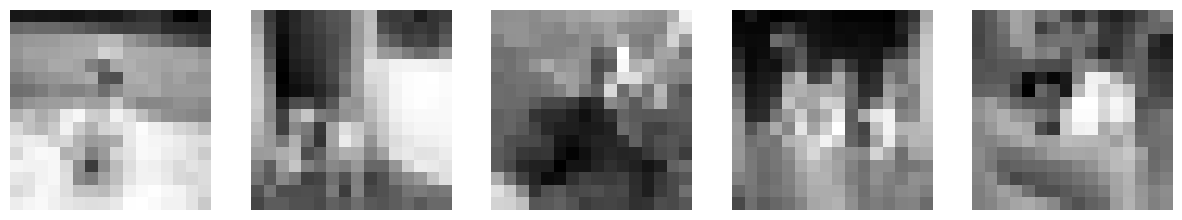

In [4]:
# mostrar 5 imagenes
import matplotlib.pyplot as plt
imagenes = [images[0], images[10], images[20], images[50], images[4]]
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
for i, img in enumerate(imagenes):
    axs[i].imshow(img, cmap="gray")
    axs[i].axis("off")
plt.show()
print()

Se separan a las imágenes y a las etiquetas en conjuntos de entrenamiento y de testeo.

In [5]:
# Separo en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

Para poder trabajar con estas imágenes se le baja una dimensión a la imagen así se reciben como un vector. Luego se entrena al regresor logístico apagando las penalidades.

In [6]:
from sklearn.linear_model import LogisticRegression
train_images_flattened = [list(img.getdata()) for img in train_images]
test_images_flattened = [list(img.getdata()) for img in test_images]

# Entrenar el modelo
reglog = LogisticRegression(max_iter=10000, penalty = None).fit(train_images_flattened, train_labels)


Se desarrolla una función que calcula la precisión del modelo y se ve que el modelo tiene una precisión de testeo de al rededor de 55%.

In [7]:
# Implementar una función que permita calcular la precisión del modelo
def accuracy(model, test_images, test_labels):
    correct = 0
    for img, label in zip(test_images, test_labels):
        prediction = model.predict([img])
        if prediction == label:
            correct += 1
    return correct / len(test_labels)
# Calculo la precisión del modelo
print(f"Precisión del modelo: {accuracy(reglog, train_images_flattened, train_labels) * 100:.2f}%")
print(f"Precisión del modelo: {accuracy(reglog, test_images_flattened, test_labels) * 100:.2f}%")



Precisión del modelo: 58.54%
Precisión del modelo: 55.04%


Considerando que `predict_log_proba` ya devuelve la logprobabilidad de lo que uno le enviara, se puede utilizar la salida para escribir una función de cross-entropy que utilice esta función.

In [8]:
# Implementar una función que permita calcular la BCE a partir de la salida predict_log_proba del modelo
import numpy as np
def binary_cross_entropy(model, test_images, test_labels):
    log_proba = model.predict_log_proba(test_images)
    logp1 = log_proba[:, 1]
    logp0 = log_proba[:, 0]
    bce_loss = -np.mean(np.array(test_labels) * logp1 + (1 - np.array(test_labels)) * logp0)
    return bce_loss

# Calculate and print the BCE of the model
print(f"BCE del entrenamiento: {binary_cross_entropy(reglog, train_images_flattened, train_labels):.4f}")
print(f"BCE del testeo: {binary_cross_entropy(reglog, test_images_flattened, test_labels):.4f}")


BCE del entrenamiento: 0.6711
BCE del testeo: 0.6900


Se busca la imagen del consejero para poder predecir qué animal es, para esto se tiene que preprocesar a la imagen de la misma forma que a las otras y luego utilizar el método `predict` para que diera 0 o 1. 

In [9]:
# Se busca clasificar la imagen del consejero
import requests
consejero = requests.get("https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/refs/heads/main/data/consejero.png", stream=True)
consejero_image = Image.open(consejero.raw)
# Preprocesamiento
consejero_image = consejero_image.resize(target_size)
consejero_image = consejero_image.convert("L")
consejero_image_flattened = list(consejero_image.getdata())
# Predicción
prediction = reglog.predict([consejero_image_flattened])
print(f"Predicción: {'Gato' if prediction == 0 else 'Perro'}")

Predicción: Perro


Se crea un nuevo modelo de regresión logística pero con regularización-l2 luego de haberle extraído componentes polinómicas. El término de regularización 'c' es un valor que al poner más bajo, refuerza más la regularización. Se han probado con otros valores y el valor que mayor precisión consiguió fue c = 0.5. De todas formas, toma mucho tiempo en converger incluso con el término `max_iter` en 10000, lo cual presta a trabajar con el modelo fitteado hasta donde pudo. En este caso, `max_iter` en 1000 da una precisión de entrenamiento cercana a 93% y para todos los valores de 'c' y distintos valores de `max_iter` lo máximo conseguido de precisión de entrenamiento es al rededor del 62%.

In [16]:
# crear un sklearn pipeline con features polinomicas y termine en una regresión logística
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Crear el pipeline
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000, penalty = "l2", C=0.5))
])
# Entrenar el pipeline
pipeline.fit(train_images_flattened, train_labels)



/home/julian/.pyenv/versions/anaconda3-2024.10-1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.5, max_iter=1000))])

In [19]:
# Calcular la precisión del pipeline
print(f"Precisión del modelo: {accuracy(pipeline, train_images_flattened, train_labels) * 100:.2f}%")
print(f"Precisión del modelo: {accuracy(pipeline, test_images_flattened, test_labels) * 100:.2f}%")


Precisión del modelo: 94.43%
Precisión del modelo: 62.16%


A través del método `predict_proba` se extraen las probabilidades de caer en alguna de las 2 etiquetas posibles. Se pueden utilizar esas probabilidades para hallar los errores tipo 1 y 2 utilizando como datos a las imágenes de entrenamiento y sus respectivas etiquetas como para saber la tasa de falsos positivos contra la tasa de verdaderos positivos. 

Se puede ver en el gráfico que el modelo con regularización tiene una curva ROC que se acerca más a la ideal que la curva ROC asociada a la regresión logística a secas. De todas formas ambos modelos son mejores que el caso aleatorio, lo cual es la vara mínima para aceptar un modelo.

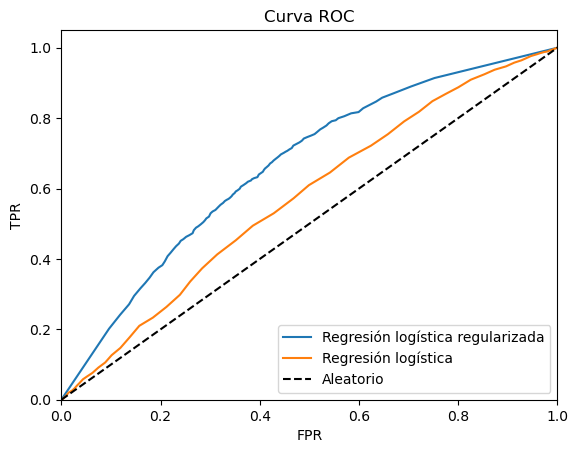

In [ ]:
# Implementar la curva ROC utilizando el método predict_proba
def roc_curve(model, test_images, test_labels):
    # Estas son las probabilidades de que y = 1
    proba = model.predict_proba(test_images)[:, 1]
    fpr, tpr = [], []
    for threshold in np.arange(0, 1.01, 0.01):
        tp = sum((proba >= threshold) & (np.array(test_labels) == 1))
        fp = sum((proba >= threshold) & (np.array(test_labels) == 0))
        fn = sum((proba < threshold) & (np.array(test_labels) == 1))
        tn = sum((proba < threshold) & (np.array(test_labels) == 0))
        
        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
    return fpr, tpr

# Calcular la curva ROC
fpr_pipe, tpr_pipe = roc_curve(pipeline, test_images_flattened, test_labels)
fpr, tpr= roc_curve(reglog, test_images_flattened, test_labels)

# Graficar la curva ROC
ax, fig = plt.subplots()
plt.plot(fpr_pipe, tpr_pipe, label="Regresión logística regularizada")
plt.plot(fpr, tpr, label="Regresión logística")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.show()